In [1]:
# Equip 4 

SyntaxError: invalid syntax (<ipython-input-1-3026444f3ad6>, line 1)

In [7]:
pip install matplotlib
pip install numpy
pip install sklear
pip install tensorflow

  Could not find a version that satisfies the requirement tensorflow (from versions: )
No matching distribution found for tensorflow


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import fashionmnist import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [3]:
plt.imshow(x_train[5])

NameError: name 'plt' is not defined

In [8]:
xr_train = np.reshape(x_train, (60000, 784))
print("x_train shape:", xr_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 784) y_train shape: (60000,)


In [9]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
xr_test = np.reshape(x_test, (10000, 784))
print("xr_test shape:", xr_test.shape, "y_test shape:", y_test.shape)

x_test shape: (10000, 28, 28) y_test shape: (10000,)
xr_test shape: (10000, 784) y_test shape: (10000,)


In [0]:
from sklearn import preprocessing
xr_test = preprocessing.normalize(xr_test)
xr_train = preprocessing.normalize(xr_train)

In [11]:
xrt_train = xr_train.transpose()
print("xrt_train shape:", xrt_train.shape, "y_test shape:", y_test.shape)

xrt_train shape: (784, 60000) y_test shape: (10000,)


In [0]:
x_simil = np.matmul(xr_test, xrt_train)

In [13]:
print("x_simil:", x_simil.shape)

x_simil: (10000, 60000)


In [0]:
ranks = np.argsort(x_simil, axis=1)[:,::-1]

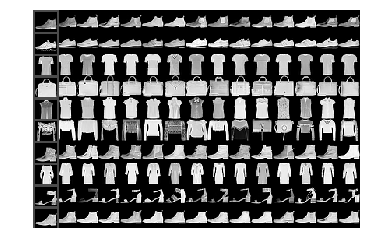

In [16]:
from PIL import Image, ImageOps

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# get the original images for visualization
x_train_images = np.reshape(x_train, (60000, 28, 28))
x_test_images = np.reshape(x_test, (10000, 28, 28))

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 900 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test_images[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()
